# Basic analysis of the data

In [1]:
#Importing require libraries
import pandas as pd #Data Manipulation
import numpy as np #Array
import matplotlib.pyplot as plt #Plotting
from sklearn.cluster import KMeans #K mean clustering
from sklearn import datasets #Dataset
import seaborn as sns #Plotting

In [2]:
#Full view the data
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Loading data
iris = datasets.load_iris()

In [9]:
#Viewing data
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
#Checking the data
display('data:',iris.data)
display('feature_names:',iris.feature_names)
display('target:',iris.target)
display('target_names:',iris.target_names)

'data:'

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

'feature_names:'

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

'target:'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

'target_names:'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Splitting data into X & y

In [11]:
#Splitting iris data into X & y
X = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns= ['target'])

# Joining Data

In [12]:
# Combining the data
df = X.join(y)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Finding Optimal Number of Clustr (Within Cluster Sum of Square)

In [13]:
#Finding optimal number of cluster through elbow method
distortions = [] #Within Cluster Sum of Square
K = range(1,11) #Number of cluster
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=51)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

# Plotting WCSS

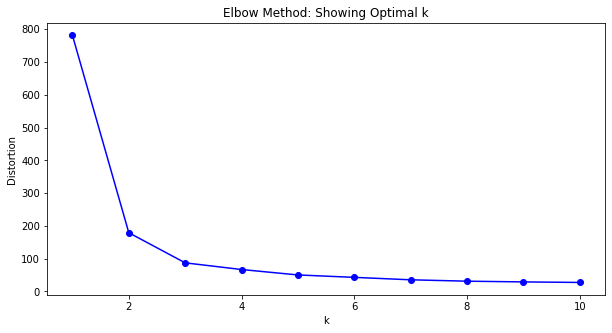

In [15]:
#Ploting optimal number of clusters with SSW
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method: Showing Optimal k')
plt.show()

## We can observe that the elbow is the number 3 which is optimal for this case 

# K Mean Clustering

In [16]:
#Creating k mean clustering with optimal number of K = 3
kmeanModel = KMeans(n_clusters=3,init='k-means++', random_state=51)
kmeanModel.fit(df)

KMeans(n_clusters=3, random_state=51)

# Summary of K Mean Clustering

In [17]:
#Model Summary
display('cluster_centers_ = ',kmeanModel.cluster_centers_)

display('inertia_ = ',kmeanModel.inertia_)

display('labels_ = ',kmeanModel.labels_)

display('max_iter = ',kmeanModel.max_iter)

display('n_clusters = ',kmeanModel.n_clusters)

display('n_features_in_ = ',kmeanModel.n_features_in_)

display('n_init = ',kmeanModel.n_init)

display('n_iter_ = ',kmeanModel.n_iter_)

display('tol = ',kmeanModel.tol)

'cluster_centers_ = '

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

'inertia_ = '

87.22062785114048

'labels_ = '

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

'max_iter = '

300

'n_clusters = '

3

'n_features_in_ = '

5

'n_init = '

10

'n_iter_ = '

7

'tol = '

0.0001

# Adding cluster variables in the data

In [18]:
#Adding variables in df data
df['k_means'] = kmeanModel.predict(df)
df['target'] = iris['target']

In [19]:
#View the data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,k_means
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


# Visualizing Clusters

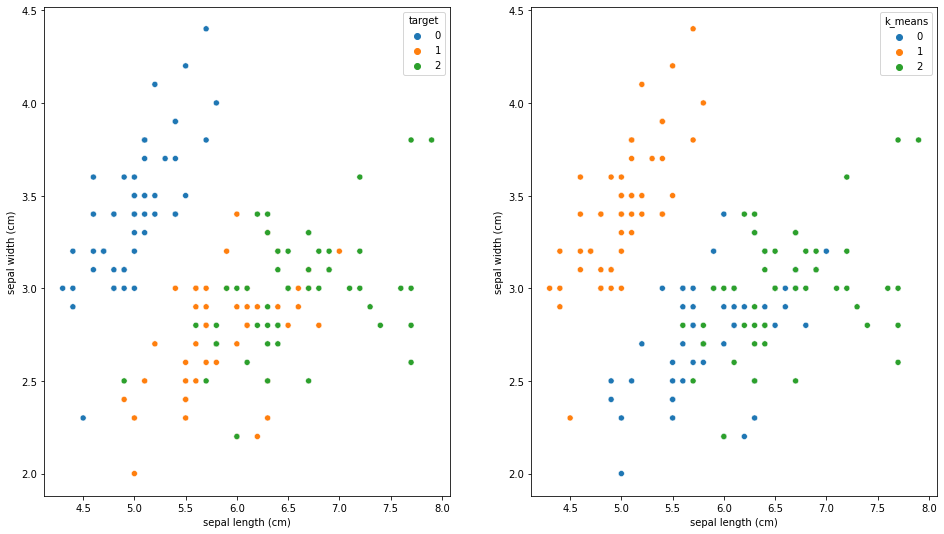

In [20]:
#Ploting data
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue='target', palette='tab10')
plt.subplot(1,2,2)
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue='k_means', palette='tab10')
plt.show()